<a href="https://colab.research.google.com/github/MarMastro/proyecto_IA_vuelos/blob/master/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASE 1**

In [1]:
import pandas as pd

datos =  pd.read_csv('/content/flights.csv')
datos.shape

(30740, 11)

In [2]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30740 entries, 0 to 30739
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       30740 non-null  int64  
 1   airline         30740 non-null  object 
 2   aircraft_type   30740 non-null  object 
 3   schengen        30740 non-null  object 
 4   origin          30740 non-null  object 
 5   arrival_time    30740 non-null  float64
 6   departure_time  30740 non-null  float64
 7   day             30740 non-null  int64  
 8   year            30740 non-null  int64  
 9   is_holiday      30740 non-null  bool   
 10  delay           30740 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 2.4+ MB


In [4]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000
mean,15.348796,13.318556,16.523435,174.300911,2012.328399,12.572553
std,8.647682,4.027473,4.150957,104.059407,1.630492,23.241823
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-39.922816
25%,8.000000,8.939996,12.668655,85.000000,2011.000000,-4.560526
50%,15.000000,14.376052,17.967963,170.000000,2012.000000,9.706861
75%,23.000000,16.909690,20.041281,262.000000,2014.000000,27.849041
max,30.000000,19.341235,23.341235,364.000000,2015.000000,123.340562


In [5]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,30740,30740,30740,30740
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,20564,13315,18405,6133


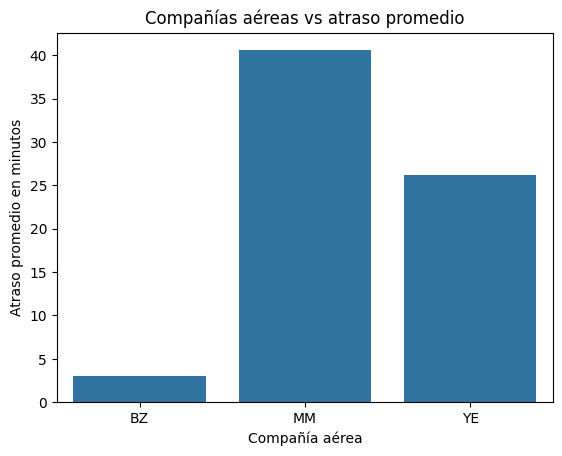

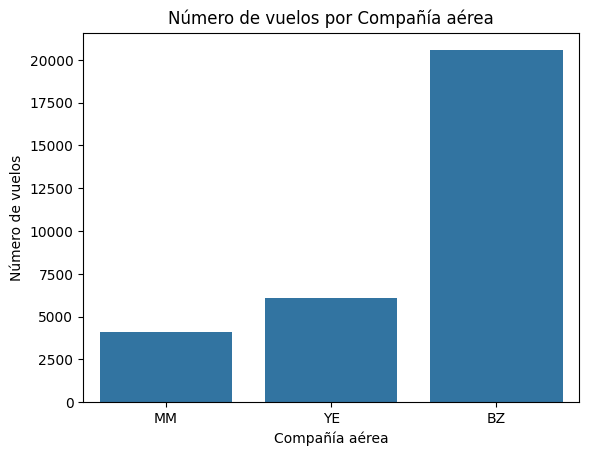

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

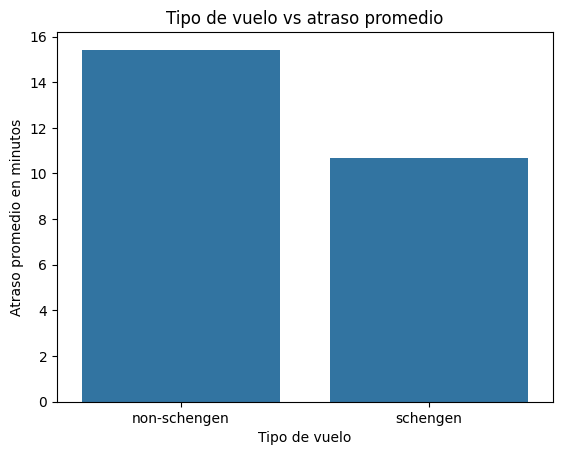

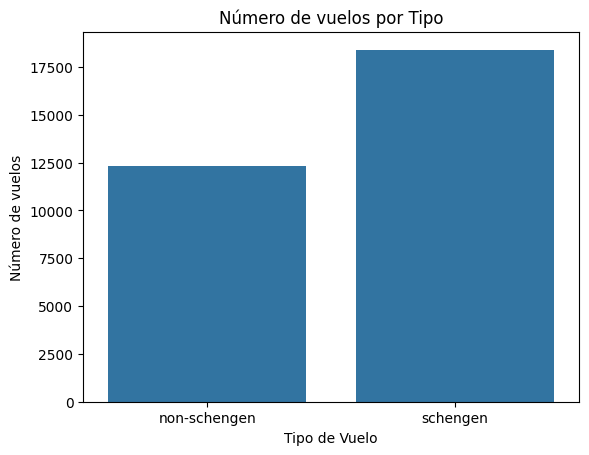

In [7]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

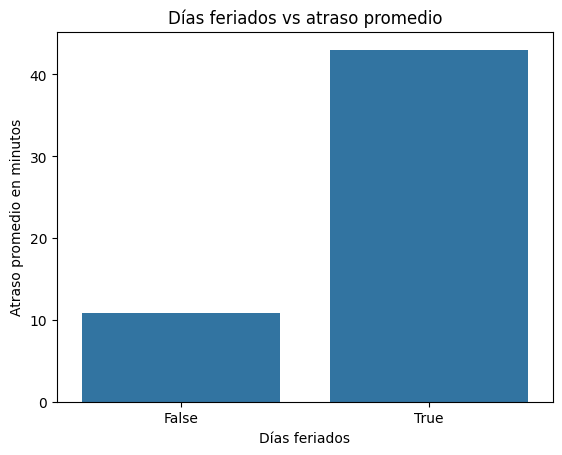

In [8]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [9]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

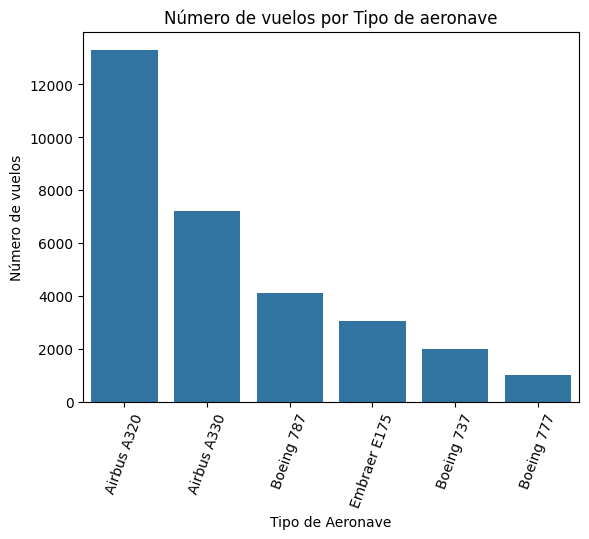

In [10]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

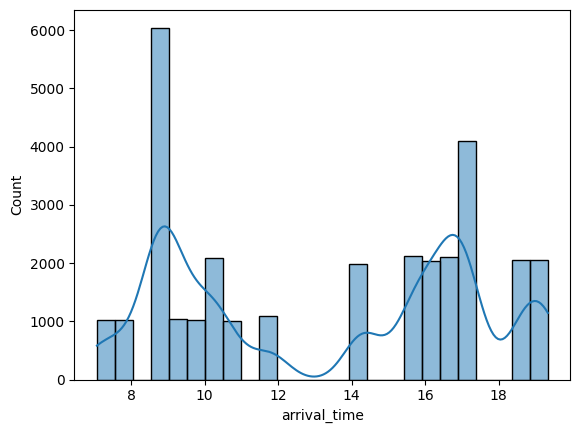

In [11]:
sns.histplot(data=datos,x='arrival_time',kde=True)

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

<Axes: xlabel='arrival_time', ylabel='Count'>

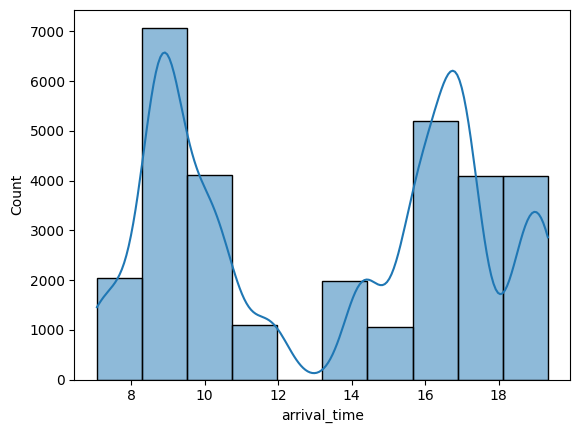

In [12]:
sns.histplot(data=datos,x='arrival_time',kde=True,bins=10)

In [13]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

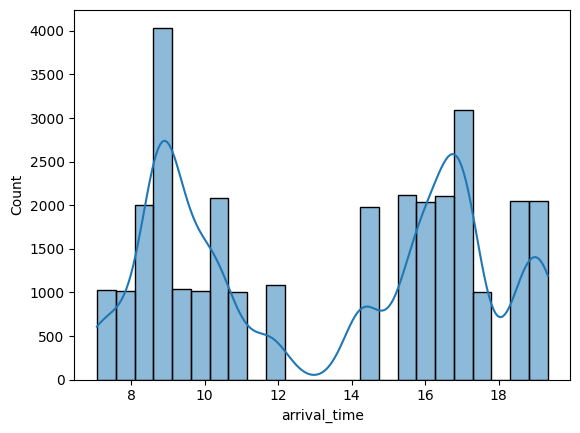

In [14]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

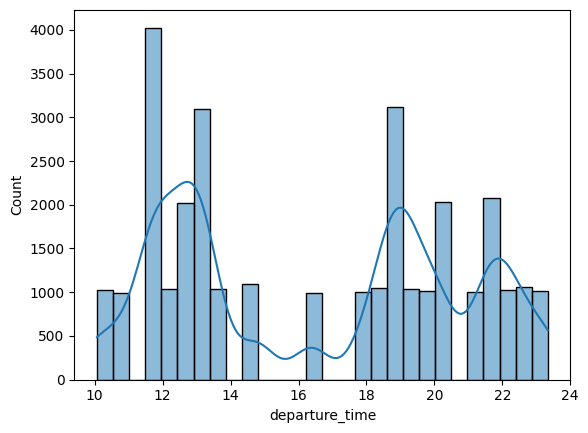

In [15]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

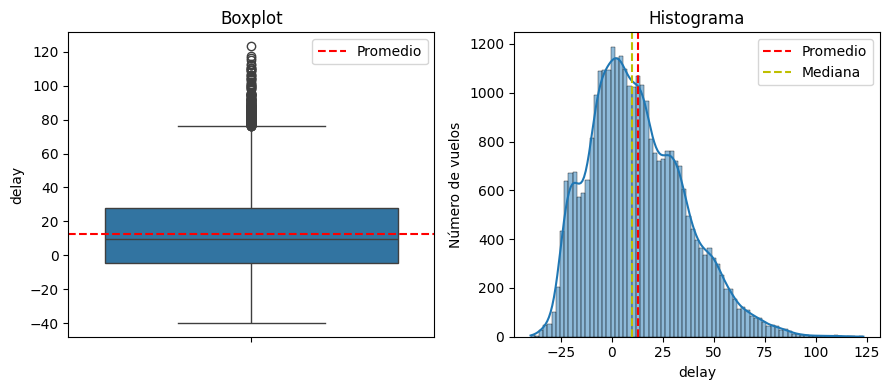

In [16]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

#**CLASE 2**

In [17]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [18]:
datos['date'] = datos['year'].astype(str) +'-'+(datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'],format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
30738,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,224,2015,False,59.252275,2015-08-13
30739,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,224,2015,False,4.000000,2015-08-13


In [19]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
12523,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,104,2012,False,42.498495,2012-04-14,True,Saturday
8827,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,223,2011,False,22.690460,2011-08-12,False,Friday
29068,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,112,2015,False,24.557169,2015-04-23,False,Thursday
10649,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,344,2011,False,25.211649,2011-12-11,True,Sunday
27122,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,348,2014,False,30.689748,2014-12-15,False,Monday


In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30740 entries, 0 to 30739
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       30740 non-null  int64         
 1   airline         30740 non-null  object        
 2   aircraft_type   30740 non-null  object        
 3   schengen        30740 non-null  object        
 4   origin          30740 non-null  object        
 5   arrival_time    30740 non-null  float64       
 6   departure_time  30740 non-null  float64       
 7   day             30740 non-null  int64         
 8   year            30740 non-null  int64         
 9   is_holiday      30740 non-null  bool          
 10  delay           30740 non-null  float64       
 11  date            30740 non-null  datetime64[ns]
 12  is_weekend      30740 non-null  bool          
 13  day_name        30740 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [21]:
import warnings

warnings.filterwarnings('ignore')

In [22]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
3736,25,BZ,Boeing 777,0,CSF,19.341235,23.341235,249,2010,0,7.388592,2010-09-07,0,Tuesday
22069,6,YE,Boeing 787,1,AUZ,17.033688,19.033688,11,2014,0,11.267281,2014-01-12,1,Sunday
26947,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,336,2014,0,4.798593,2014-12-03,0,Wednesday


In [23]:
categoricas = ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
datos_codificados =pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
18058,4,1,11.781391,14.781391,108,2013,0,-8.944467,2013-04-19,0,...,1,0,0,1,0,0,0,0,0,0
22593,11,0,10.177197,13.177197,46,2014,0,-5.284556,2014-02-16,1,...,0,0,0,0,0,0,1,0,0,0
17694,17,0,16.718722,21.718722,84,2013,0,23.731523,2013-03-26,0,...,0,0,0,0,0,0,0,0,1,0
15041,2,1,19.196804,22.196804,272,2012,0,9.334909,2012-09-29,1,...,0,0,1,0,0,1,0,0,0,0
8649,8,1,15.729617,18.729617,211,2011,0,-8.843322,2011-07-31,1,...,0,0,1,0,0,0,1,0,0,0


In [25]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973914
departure_time,0.973914,1.000000


In [26]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30740 entries, 0 to 30739
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   30740 non-null  int64         
 1   schengen                    30740 non-null  int64         
 2   arrival_time                30740 non-null  float64       
 3   departure_time              30740 non-null  float64       
 4   day                         30740 non-null  int64         
 5   year                        30740 non-null  int64         
 6   is_holiday                  30740 non-null  int64         
 7   delay                       30740 non-null  float64       
 8   date                        30740 non-null  datetime64[ns]
 9   is_weekend                  30740 non-null  int64         
 10  airline_BZ                  30740 non-null  int64         
 11  airline_MM                  30740 non-null  int64     

In [27]:
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
15555,1,11.781391,0,-4.247630,1,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
22758,0,15.496519,0,6.421694,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23608,0,16.718722,0,1.181532,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23214,0,10.172731,0,-22.190927,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
25525,0,16.718722,0,-4.293358,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
29933,1,9.668655,0,12.156202,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11639,0,10.177197,0,1.502909,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
23805,0,17.041281,0,56.753914,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20451,1,8.923441,0,-11.565397,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12509,1,11.781391,0,-25.816020,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


#**CLASE 3**

https://scikit-learn.org/stable/

In [28]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['delay'],axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [30]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.3346, 'MAE': 18.737, 'R2': -0.0}

In [31]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.8429, 'MAE': 11.1218, 'R2': 0.6481}

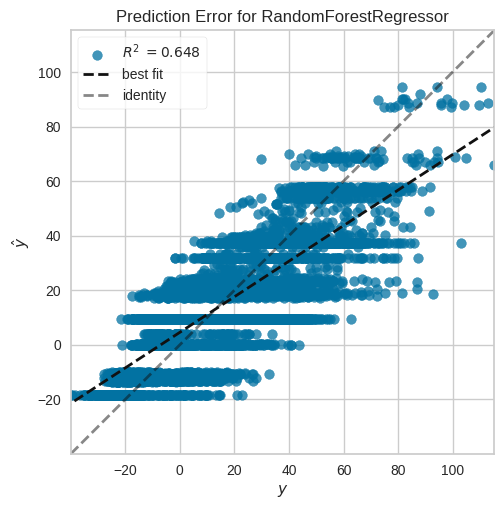

In [32]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

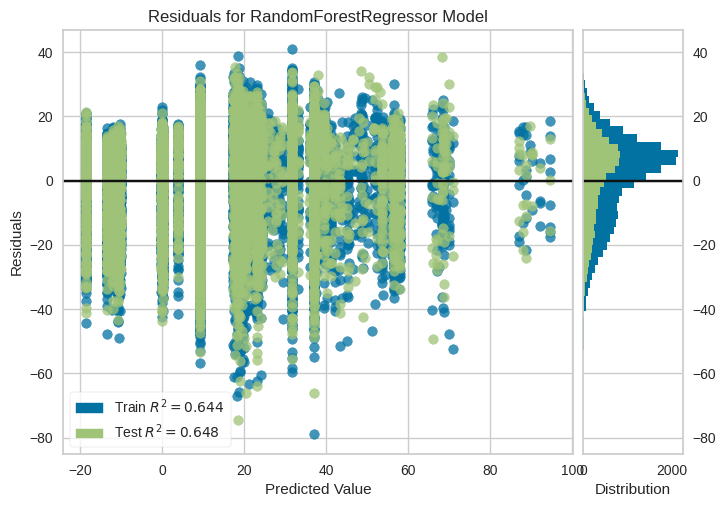

In [33]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [34]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([1.35150313, 1.23538542, 1.28547525, 1.301229  , 1.55462885]),
 'score_time': array([0.03415513, 0.03420734, 0.03327918, 0.03688645, 0.04748154]),
 'test_RMSE': array([-14.03056561, -13.7906013 , -13.77130819, -13.80204421,
        -14.07359179]),
 'test_MAE': array([-11.1860171 , -11.01427875, -11.10656135, -11.1485025 ,
        -11.17932896]),
 'test_R2': array([0.62647114, 0.65169829, 0.65190698, 0.64281506, 0.63323535])}

#**CLASE 4**

In [35]:
len(df.columns)

31

In [36]:
importances = modelo.feature_importances_

In [37]:
feature_importances = pd.DataFrame({'Features':X.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.32
2,is_holiday,14.94
7,aircraft_type_Airbus A320,9.09
8,aircraft_type_Airbus A330,6.02
12,aircraft_type_Embraer E175,4.54
1,arrival_time,4.23
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,1.81
15,origin_CSF,1.53
21,origin_TZF,1.02


In [38]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8485,15.3091,13.8667,13.8512,13.8425,13.8428,13.8429
MAE,14.9461,12.2194,11.1497,11.1341,11.1217,11.1218,11.1218
R2,0.3475,0.5696,0.6469,0.6476,0.6481,0.6481,0.6481


In [39]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.8667,13.8667,13.8670,13.8658,13.8620,13.8512
MAE,11.1497,11.1497,11.1501,11.1506,11.1480,11.1341
R2,0.6469,0.6469,0.6468,0.6469,0.6471,0.6476


In [40]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_TZF,origin_PUA,origin_MWL,day_name_Tuesday
0,0,0,1,0,0,8.885071,0,1,0,0,0,0,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,0,0
2,1,0,0,0,1,18.635384,0,0,0,1,0,0,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,0,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30735,1,0,0,1,0,15.967963,0,0,0,0,0,0,0
30736,0,0,1,0,0,16.245220,0,0,0,1,0,0,0
30737,1,0,1,0,0,15.496519,0,0,0,0,0,0,0
30738,0,0,1,0,0,8.885071,0,1,0,0,0,0,0


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)

In [42]:
param_grid = {
              'max_depth':[5,10,15],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,4,6],
              'n_estimators':[100,150,200]
             }

In [43]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid, scoring='r2',
                          cv=cv)

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [44]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [45]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.3472, 'MAE': 10.7443, 'R2': 0.6737}

In [46]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.8667,13.8667,13.8670,13.8658,13.8620,13.8512,13.3472
MAE,11.1497,11.1497,11.1501,11.1506,11.1480,11.1341,10.7443
R2,0.6469,0.6469,0.6468,0.6469,0.6471,0.6476,0.6737


In [47]:
import pickle

try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Modelo serializado con éxito
